In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
from config import gkey

gmaps.configure(api_key=gkey)

In [2]:
construction_loss = pd.read_csv ('Fire.csv')
construction_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


In [3]:
construction_loss["CONSTRUCTION"].count()

542

In [4]:
construction_loss["CONSTRUCTION"].value_counts

<bound method IndexOpsMixin.value_counts of 0       WOOD
1       WOOD
2       WOOD
3       WOOD
4       WOOD
       ...  
616     WOOD
617     WOOD
618     WOOD
619    METAL
620     WOOD
Name: CONSTRUCTION, Length: 621, dtype: object>

In [5]:
#unique structures included in the data set
unique_construction_df = construction_loss["CONSTRUCTION"].unique()

unique_construction_df

array(['WOOD', 'BRICK', nan, 'MASONRY', 'METAL', 'FRAME', 'BLOCK',
       'CONCRETE', 'STUCCO', 'COMBO', 'STEEL'], dtype=object)

In [6]:
#average percent loss by structure type
avg_loss_construction = construction_loss.groupby(["CONSTRUCTION"]).mean()["PERCENTAGE LOSS"]

avg_loss_construction

CONSTRUCTION
BLOCK       13.000000
BRICK        8.639459
COMBO        0.050000
CONCRETE     0.084167
FRAME       24.490000
MASONRY      3.975000
METAL       22.154444
STEEL        3.587500
STUCCO       0.700000
WOOD        11.623185
Name: PERCENTAGE LOSS, dtype: float64

In [7]:
#what does frame stand for?
#BLOCK=Concrete/Cinder Block

#Top 5 
# 1. Steel
# 2. Concrete 
# 3. Wood
# 4. Stone
# 5. Brick/Masonry

#CONCRETE 
#FRAME and WOOD
#MASONRY and BRICK and BLOCK
#STEEL and METAL
#COMBO        
#STUCCO    


In [8]:
#clean up structure types to consolidate "like" or "same" names
cleaned_construction_loss = construction_loss.replace({
     "STEEL":"STEEL & METAL",
     "METAL":"STEEL & METAL",     
    
     "FRAME":"WOOD",                
     "WOOD":"WOOD",                  
     
     "MASONRY": "MASONRY & BRICK",                   
     "BRICK": "MASONRY & BRICK",                    
     "BLOCK": "MASONRY & BRICK",
     
     "COMBO": "OTHER",
     "STUCCO": "OTHER",
     
    })
cleaned_construction_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


In [9]:
#total number of structures for structure type, grouped by percentage loss
loss_construction = cleaned_construction_loss.groupby(["CONSTRUCTION"]).count()["PERCENTAGE LOSS"]

loss_construction

CONSTRUCTION
CONCRETE            12
MASONRY & BRICK     43
OTHER                2
STEEL & METAL       13
WOOD               472
Name: PERCENTAGE LOSS, dtype: int64

In [10]:
colors_list= [(0,1,0),(0,0,.99),(1,0,0),(1,1,0),(.6,.19,.8)] #[(0,255,0),(0,0,254),(255,0,0),(255,255,0),(153,50,204)]    
 
#GREEN, #BLUE, #RED, #yellow1, #darkorchid


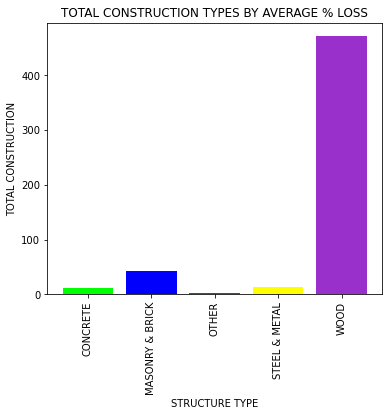

In [11]:
unique_construction_df=cleaned_construction_loss[['CONSTRUCTION', 'PERCENTAGE LOSS']]
unique_construction_df=unique_construction_df.dropna()
loss_construction_df = unique_construction_df.groupby(["CONSTRUCTION"]).count()
loss_construction_df=loss_construction_df.reset_index()
loss_construction = loss_construction_df["PERCENTAGE LOSS"]
unique_construction = loss_construction_df['CONSTRUCTION']

x_axis = unique_construction
y_axis = loss_construction
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=colors_list)

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("TOTAL CONSTRUCTION")
plt.title("TOTAL CONSTRUCTION TYPES BY AVERAGE % LOSS")

#plt.tight_layout()
plt.show()

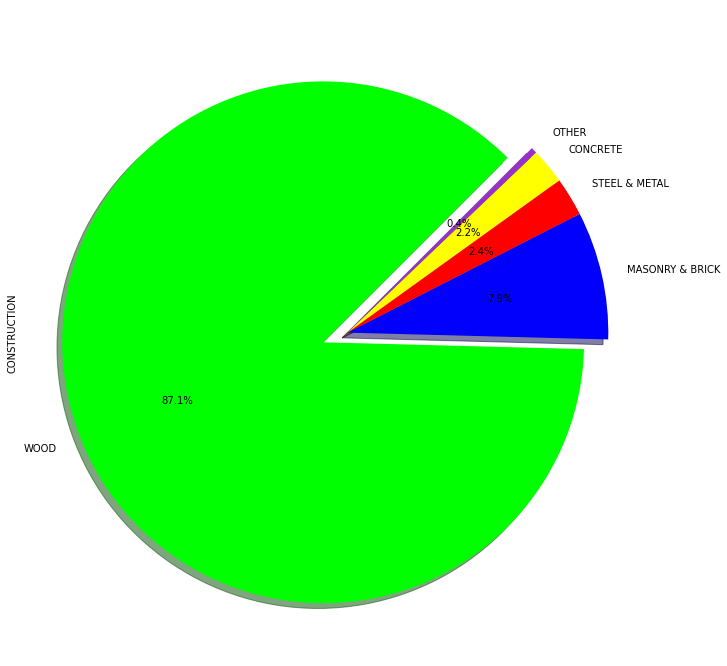

In [12]:
construction_type = cleaned_construction_loss['CONSTRUCTION'].value_counts()

fig = plt.figure(figsize=(12,12))
explode = (0.1, 0, 0, 0, 0)
construction_type.plot(kind="pie",autopct="%1.1f%%", explode=explode, 
                       colors=colors_list, shadow=True, startangle=45)

plt.xticks(rotation=90)
plt.show()

In [13]:
#new average percent loss by structure type
avg_loss_construction = cleaned_construction_loss.groupby(["CONSTRUCTION"]).mean()["PERCENTAGE LOSS"]

avg_loss_construction

CONSTRUCTION
CONCRETE            0.084167
MASONRY & BRICK     8.408372
OTHER               0.375000
STEEL & METAL      16.441538
WOOD               11.650445
Name: PERCENTAGE LOSS, dtype: float64

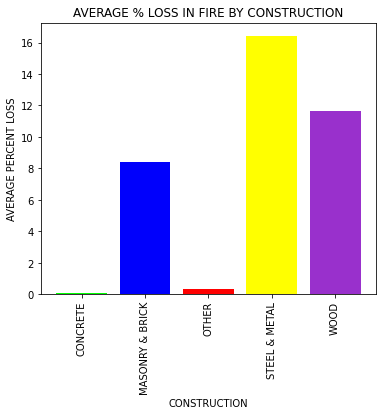

In [14]:
#removing nan from list
unique_construction_df=cleaned_construction_loss[['CONSTRUCTION', 'PERCENTAGE LOSS']]
unique_construction_df=unique_construction_df.dropna()
avg_loss_construction_df = unique_construction_df.groupby(["CONSTRUCTION"]).mean()
avg_loss_construction_df=avg_loss_construction_df.reset_index()
avg_loss_construction = avg_loss_construction_df["PERCENTAGE LOSS"]
unique_construction = avg_loss_construction_df['CONSTRUCTION']

x_axis = unique_construction
y_axis = avg_loss_construction
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=colors_list)

plt.xlabel("CONSTRUCTION")
plt.ylabel("AVERAGE PERCENT LOSS")
plt.title("AVERAGE % LOSS IN FIRE BY CONSTRUCTION")

# #plt.tight_layout()
plt.show()

In [15]:
# Configure gmaps.
gmaps.configure(api_key=gkey)

In [16]:
lat_for_map=cleaned_construction_loss['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=cleaned_construction_loss['Lng'].astype(float)
lng_for_map.astype(float)

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [17]:
# Use the Lat and Lng as locations and Percentage Loss as the weight.
locations = cleaned_construction_loss[["Lat", "Lng"]]
construction_type_pct_loss = cleaned_construction_loss["PERCENTAGE LOSS"].astype(float)

In [18]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [19]:
# Add Heatmap layer to map.
fig = gmaps.figure(layout=figure_layout, map_type="HYBRID", center=(32.83, -96.75), zoom_level=10)

heat_layer = gmaps.heatmap_layer(locations, weights=construction_type_pct_loss, 
                                 dissipating=False, max_intensity=100, 
                                 point_radius=0.02)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='450px', margin='0 auto 0 auto', padding='1px', wi…

In [20]:
# Customize the size of the figure
figure_layout = {
    'width': '500px',
    'height': '550px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [21]:
fires_df=cleaned_construction_loss[['Lat','Lng']]
fires_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)
fig=gmaps.figure(layout=figure_layout, center=(32.83, -96.74), zoom_level=10)
fig.add_layer(fires_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [22]:
# Use the Lat and Lng as locations and Percentage Loss as the weight.
locations = cleaned_construction_loss[["Lat", "Lng"]]
construction_type_pct_loss = cleaned_construction_loss["PERCENTAGE LOSS"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=construction_type_pct_loss, 
                                 dissipating=False, max_intensity=100, 
                                 point_radius=0.02)

#marker_layer = gmaps.marker_layer(locations)

marker_layer=gmaps.symbol_layer(fires_df,fill_color=(0,0,254),stroke_color=(0,0,254),scale=2)


# Display figure
fig = gmaps.figure()
fig = gmaps.figure(layout=figure_layout, map_type="HYBRID", center=(32.83, -96.74), zoom_level=10)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [25]:
structure_df = cleaned_construction_loss.set_index('CONSTRUCTION')

structure_church=structure_df.loc['CONCRETE']
structure_layer_1=structure_church[['Lat','Lng']]

structure_commercial=structure_df.loc['MASONRY & BRICK']
structure_layer_2=structure_commercial[['Lat','Lng']]

structure_garage=structure_df.loc['OTHER']
structure_layer_3=structure_garage[['Lat','Lng']]

structure_lodging=structure_df.loc['STEEL & METAL']
structure_layer_4=structure_lodging[['Lat','Lng']]

structure_office=structure_df.loc['WOOD']
structure_layer_5=structure_office[['Lat','Lng']]

heat_layer = gmaps.heatmap_layer(locations, weights=construction_type_pct_loss, 
                                 dissipating=False, max_intensity=100, 
                                 point_radius=0.02)

layer_1=gmaps.symbol_layer(structure_layer_1,fill_color=(255,105,180),stroke_color=(255,105,180),scale=3)    #GREEN
layer_2=gmaps.symbol_layer(structure_layer_2,fill_color=(153,50,204),stroke_color=(153,50,204),scale=3)    #darkorchid
layer_3=gmaps.symbol_layer(structure_layer_3,fill_color=(255,0,0),stroke_color=(255,0,0),scale=4)    #RED
layer_4=gmaps.symbol_layer(structure_layer_4,fill_color=(255,255,0),stroke_color=(255,255,0),scale=3)  #yellow1
layer_5=gmaps.symbol_layer(structure_layer_5,fill_color=(0,0,254),stroke_color=(0,0,254),scale=2)   #BLUE 

fig=gmaps.figure(layout=figure_layout, map_type="TERRAIN", center=(32.83, -96.74), zoom_level=10)

fig.add_layer(heat_layer)

fig.add_layer(layer_5)
fig.add_layer(layer_1)
fig.add_layer(layer_2)
fig.add_layer(layer_3)
fig.add_layer(layer_4)


fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…